In this project, you’ll be working as a data scientist for a news analytics company interested in monitoring and analyzing news on social media platforms to look for misinformation. One of the most popular platforms is Twitter, which has become an important communication channel in times of emergency.

In this context, your company has given you a project in which they want you to build a deep learning text classification model that predicts which Tweets are about real disasters and which aren’t. The dataset comes from [Kaggle](https://www.kaggle.com/competitions/nlp-getting-started/overview).

### Data Description

You'll be using the `train.csv` and `test.csv` datasets that contain five columns:

1.  `id`: a unique identifier for each tweet
    
2.  `keyword`: a particular keyword from the tweet (may be blank)
    
3.  `location`: the location the tweet was sent from (may be blank)
    
4.  `text`: the text of the tweet
    
5.  `target`: denotes whether a tweet is about a real disaster (`1`) or not (`0`). This is the target variable.
    

#### Download the Data

Download the `train.csv` file [here](https://dsserver-prod-resources-1.s3.amazonaws.com/nlp/train.csv).

Download the `test.csv` file [here](https://dsserver-prod-resources-1.s3.amazonaws.com/nlp/test.csv).

### Loading the Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")
print(df.shape)
print(df.columns)

(7613, 5)
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df["keyword"].nunique()

221

In [8]:
 print(df['location'].nunique()); print(df['text'].nunique()); print(df['id'].nunique());print(df['target'].nunique())

3341
7503
7613
2


### Data Exploration

So, after taking a quick look at the data, you might have spotted some missing values in a few variables. But before we rush into fixing them, let's pause and ask ourselves an important question: Do these variables actually contribute to predicting our outcomes, or could they be unnecessary?

At this point, we'll dive deeper into the data, and analyze the target variable, `label`. It's all about figuring out if these variables are worth keeping or if they're just dead weight. Let's get to it!

In [9]:
df = df.drop(['id','keyword', 'location'], axis=1)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB
None
                                                text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1


In [10]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [11]:
df['target'].value_counts(normalize=True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

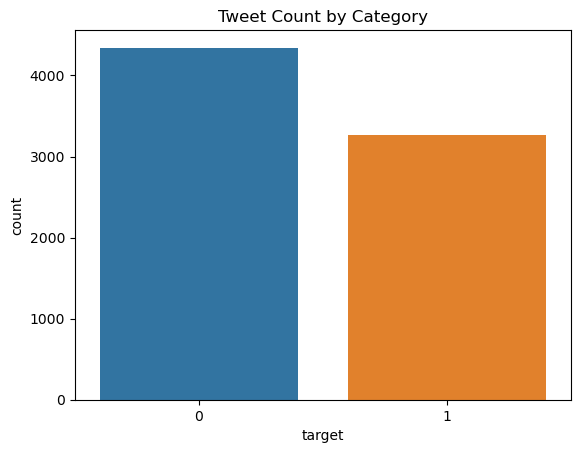

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot( df, x = "target", ).set(title = 'Tweet Count by Category')
plt.show()

We can see approximately 43% of the tweets were indicative of real disaster, and we can also see that the data is fairly balanced. We have also dropped some of the variables that might not carry predictive power. it's a text classification model we are dealing with, so the two variables of interest now are the `target` and the `text` variables.

### Text Preprocessing

So by now, you probably know that we're diving headfirst into the world of disaster-related tweets. And who knew those tweets are as unstructured as a pile of mismatched socks?! But don't worry, we've got some exciting text processing tasks lined up for you. Get ready for some serious text wrangling!

In the next step, you'll create some new variables after each text preprocessing task. It's totally up to you whether you want to try it or not. It's not mandatory, so if you skip it, no worries! But if you do go for it, you'll be able to witness the magic of text transformation firsthand. It's like a before-and-after makeover for your text variable. Pretty cool, right? So go ahead, give it a shot and see the power of text preprocessing unfold!

In [20]:
# Lower Character all the Texts

df["text"] = df["text"].str.lower()

In [24]:
# Removing Punctuations and Numbers from the Text
df["text"] = df["text"].str.replace(r"[^a-zA-Z]", " ")

In [25]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CGDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
from nltk.tokenize import word_tokenize

In [28]:
df['text_tokenized'] = df["text"].apply(word_tokenize)

In [29]:
df.head()

,text,target,text_tokenized
0,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, #, ea..."
1,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, ., canada]"
2,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua..."
4,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, #, ..."


In [30]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CGDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords

In [34]:
stop_words = set(stopwords.words("english"))

In [35]:
stop_words.remove("not")

In [39]:
df['text_stop'] = df["text_tokenized"].apply(lambda x: [k for k in x if k not in stop_words])

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer

In [41]:
nltk.download('wordnet')
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CGDC\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CGDC\AppData\Roaming\nltk_data...


True

In [44]:
lemmatizer = WordNetLemmatizer()

In [46]:
df['text_lemmatized'] = df["text_stop"].apply(lambda x: [lemmatizer.lemmatize(i, pos = "v") for i in x ])

In [50]:
df['final'] = df['text_lemmatized'].str.join(" ")

In [51]:
df.head()

,text,target,text_tokenized,text_stop,text_lemmatized,final
0,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for...","[deeds, reason, #, earthquake, may, allah, for...",deeds reason # earthquake may allah forgive us
1,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]",forest fire near la ronge sask . canada
2,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie...","[residents, ask, 'shelter, place, ', notify, o...",residents ask 'shelter place ' notify officer ...
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","13,000 people receive # wildfires evacuation o..."
4,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[get, send, photo, ruby, #, alaska, smoke, #, ...",get send photo ruby # alaska smoke # wildfires...


We can see the transformation of `text` column into `final` column post all the processing steps. This processed text is more suitable for building text classification models.

### Visualization with WordCloud

Congratulations for acing that text preprocessing step! Did you see how the `text` variable transformed into something awesome after all that preprocessing magic? Now, get ready to take it up a notch with some cool text visualization using WordCloud.

Here's the deal: We're on a mission to build a deep learning text classification model that can predict if a tweet is about a real disaster or just another random tweet. So, it's time to put on our visualization goggles and take a peek at what the WordCloud has to say.

The plan is simple: We'll check out the WordCloud for tweets that scream "disaster" and compare them to those that are as far from disaster as possible. It's like peering into two different worlds of tweets and seeing how they differ. This visual journey will give you some serious insights into our text classification adventure. So, let's dive into the WordCloud and unravel the tales of disaster and non-disaster tweets!

In [52]:
data_disaster = df[df['target'] == 1]
data_not_disaster = df[df['target'] == 0]

In [55]:
from wordcloud import WordCloud

In [58]:
print(str((data_disaster["final"])))

0          deeds reason # earthquake may allah forgive us
1                 forest fire near la ronge sask . canada
2       residents ask 'shelter place ' notify officer ...
3       13,000 people receive # wildfires evacuation o...
4       get send photo ruby # alaska smoke # wildfires...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    @ aria_ahrary @ thetawniest control wild fire ...
7610    m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611    police investigate e-bike collide car little p...
7612    latest : home raze northern california wildfir...
Name: final, Length: 3271, dtype: object


In [62]:
WordCloud_disaster = WordCloud(max_words=500, random_state=100, background_color="white").generate(str(data_disaster["final"]))

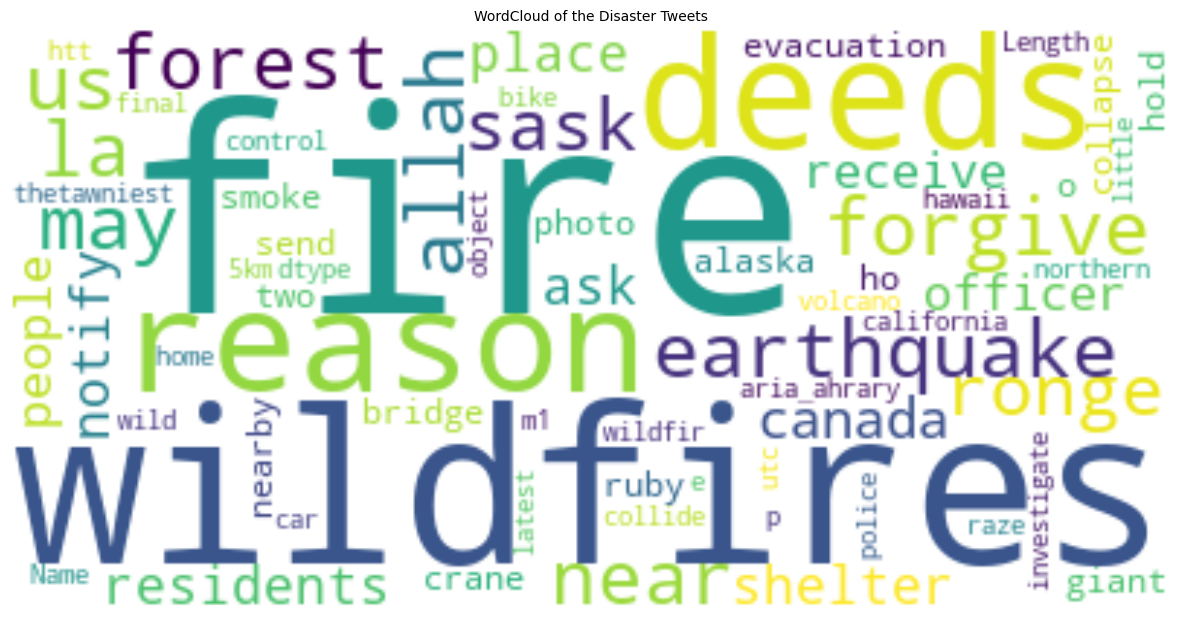

In [63]:
plt.figure(figsize=(15, 10))
plt.imshow(WordCloud_disaster, interpolation="bilinear")
plt.title('WordCloud of the Disaster Tweets', fontsize=10)
plt.axis("off")
plt.show()

In [64]:
WordCloud_not_disaster  = WordCloud(max_words=500, random_state=100, 
                               background_color="white").generate(str(data_not_disaster["final"]))

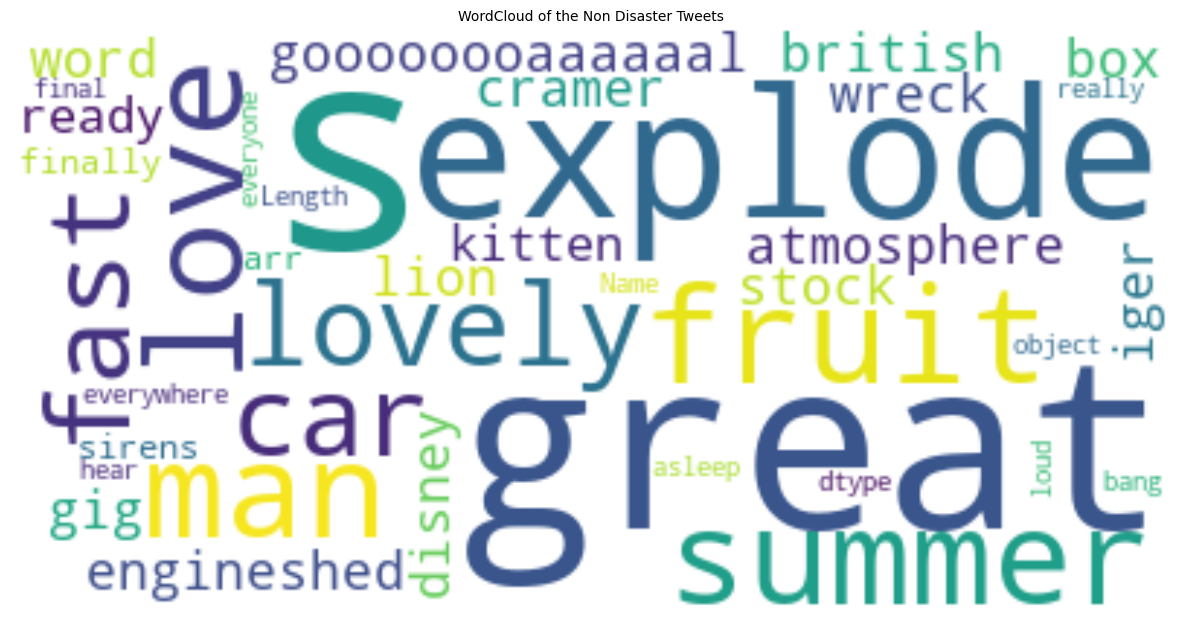

In [65]:
plt.figure(figsize=(15,10))
plt.imshow(WordCloud_not_disaster, interpolation='bilinear')
plt.title('WordCloud of the Non Disaster Tweets', fontsize=10)
plt.axis("off")
plt.show()

If we examine the wordcloud for disaster and non-disaster related tweets, we can see there are certain words that are more frequent in these respective tweets. This difference is sometimes useful in understanding the intricacies of the data and visually presenting it!

### Build a Shallow Neural Network

Now that you're done with all the preprocessing stuff, and also had some fun with text visualization, get ready to dive into the exciting world of text classification modeling! =

To kick things off, you'll start with a simple model. This network consists of two main layers: 
* a vectorizer and 
* an embedding layer. 

In [66]:
X = df["final"]
y = df["target"]

In [68]:
print(X.head())
print(y.head())

0       deeds reason # earthquake may allah forgive us
1              forest fire near la ronge sask . canada
2    residents ask 'shelter place ' notify officer ...
3    13,000 people receive # wildfires evacuation o...
4    get send photo ruby # alaska smoke # wildfires...
Name: final, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [69]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6090,) (6090,)
Testing set shape: (1523,) (1523,)


In [70]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [71]:
vectorizer_layer = TextVectorization(max_tokens=7500,output_sequence_length = 128)

In [72]:
vectorizer_layer.adapt(X_train)

In [73]:
from tensorflow.keras.layers import Embedding

In [75]:
embedding_layer = Embedding(input_dim=7500, output_dim = 128)

In [77]:
from tensorflow.keras import layers

In [79]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)
model.add(embedding_layer)
model.add(layers.Dense(1, activation="sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=["accuracy"] )

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 128, 128)            │         960,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128, 1)              │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 960,129 (3.66 MB)

 Trainable params: 960,129 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(X_train, y_train, epochs=10, verbose=2)
model.evaluate(X_test, y_test)

Epoch 1/10
191/191 - 5s - 27ms/step - accuracy: 0.5682 - loss: 0.6880
Epoch 2/10
191/191 - 3s - 14ms/step - accuracy: 0.5651 - loss: 0.6855
Epoch 3/10
191/191 - 3s - 13ms/step - accuracy: 0.5644 - loss: 0.6829
Epoch 4/10
191/191 - 3s - 14ms/step - accuracy: 0.5709 - loss: 0.6797
Epoch 5/10
191/191 - 3s - 14ms/step - accuracy: 0.5715 - loss: 0.6822
Epoch 6/10
191/191 - 3s - 13ms/step - accuracy: 0.5684 - loss: 0.6801
Epoch 7/10
191/191 - 3s - 13ms/step - accuracy: 0.5804 - loss: 0.6767
Epoch 8/10
191/191 - 3s - 13ms/step - accuracy: 0.5660 - loss: 0.6835
Epoch 9/10
191/191 - 3s - 14ms/step - accuracy: 0.5797 - loss: 0.6744
Epoch 10/10
191/191 - 3s - 13ms/step - accuracy: 0.5812 - loss: 0.6737
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5730 - loss: 0.6791


[0.6768468618392944, 0.5823467373847961]

We divided the data in the 80:20 ratio, where we will use 80% of the data for training the model, while the other 20% of the data is used to test the model. You should feel free to use a different train-to-test ratio. With the model we built above, we achieved an accuracy of approximately 58% on both the training and the test set. The higher the accuracy value, the better the model is performing. We observe that this model did not achieved a great result. We'll observe the performance in the other models we'll build.

### Build a Multilayer Deep Text Classification Model

Congrats on creating your first text classification model in this cool! I hope you got some decent results, but hey, no need to stress if it didn't turn out exactly as expected. We're just getting started here, and we have plenty more exciting stuff to dive into.

We're going to level up and build some seriously advanced models. One of these big ones is a multilayer deep neural network, which you'll be tackling on this screen. We're going to include some fancy techniques like `GlobalAveragePooling1D()`, regularization, and `Dropout` layers to the model architecture. You'll want to keep an eye on the model performance to see if you can make it even better than your previous model.

So, don't worry if things didn't go perfectly. You'll get a chance to tweak, experiment, and make this model shine!

In [82]:
from tensorflow.keras.regularizers import L1, L2, L1L2

In [85]:
model_regularized = tf.keras.models.Sequential()
model_regularized.add(tf.keras.Input(shape = (1,), dtype=tf.string))
model_regularized.add(vectorizer_layer)
model_regularized.add(embedding_layer)
model_regularized.add(tf.keras.layers.GlobalAveragePooling1D())
model_regularized.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=L1(0.0005)))
model_regularized.add(tf.keras.layers.Dropout(0.6))

model_regularized.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=L1L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [86]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_regularized.fit(X_train, y_train, epochs=10, verbose=2)
model_regularized.evaluate(X_test, y_test)

Epoch 1/10
191/191 - 8s - 43ms/step - accuracy: 0.6069 - loss: 1.6077
Epoch 2/10
191/191 - 3s - 15ms/step - accuracy: 0.7274 - loss: 1.3830
Epoch 3/10
191/191 - 3s - 15ms/step - accuracy: 0.8176 - loss: 1.1362
Epoch 4/10
191/191 - 3s - 14ms/step - accuracy: 0.8521 - loss: 0.9303
Epoch 5/10
191/191 - 3s - 14ms/step - accuracy: 0.8691 - loss: 0.8016
Epoch 6/10
191/191 - 3s - 14ms/step - accuracy: 0.8727 - loss: 0.7303
Epoch 7/10
191/191 - 3s - 14ms/step - accuracy: 0.8788 - loss: 0.6709
Epoch 8/10
191/191 - 3s - 14ms/step - accuracy: 0.8810 - loss: 0.6316
Epoch 9/10
191/191 - 3s - 15ms/step - accuracy: 0.8803 - loss: 0.6101
Epoch 10/10
191/191 - 3s - 15ms/step - accuracy: 0.8901 - loss: 0.5864
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7913 - loss: 0.7457


[0.7314959764480591, 0.8003939390182495]

So we built the multi-layer deep text classification model with five additional dense layers as compared with the previous model. We also introduced regularization and a droput layer. It seemed to have a positive impact on the model performace as the accuracy improved for both training and test set. The accuracy was around 89% and 80% on the training and the test set, respectively. A significant increase from our previous model which is a great progress.

### Building a Multilayer Bidirectional LSTM Model

Great job on building that multilayer deep learning text classification model! You're really crushing it and hopefully you got some great results!

Now let's try out some multilayer bidirectional LSTM models.

In [87]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import Adam, RMSprop

In [88]:
ml_bi_lstm = Sequential()
ml_bi_lstm.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm.add(vectorizer_layer)
ml_bi_lstm.add(embedding_layer)
ml_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
ml_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
ml_bi_lstm.add(Bidirectional(LSTM(64)))
ml_bi_lstm.add(Dense(64, activation='elu', kernel_regularizer=L1L2(0.0001)))
ml_bi_lstm.add(Dense(32, activation='elu', kernel_regularizer=L2(0.0001)))
ml_bi_lstm.add(Dense(8, activation='elu', kernel_regularizer=L2(0.0005)))
ml_bi_lstm.add(Dense(8, activation='elu'))
ml_bi_lstm.add(Dense(4, activation='elu'))
ml_bi_lstm.add(Dense(1, activation='sigmoid'))

opt = RMSprop(learning_rate=0.0001, rho=0.8, momentum=0.9)
ml_bi_lstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
ml_bi_lstm.fit(X_train, y_train, epochs=10)
test_loss, test_acc = ml_bi_lstm.evaluate(X_test, y_test)
print(f"Test set accuracy: {test_acc}")

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 111s 471ms/step - accuracy: 0.8535 - loss: 0.4740
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 463ms/step - accuracy: 0.8978 - loss: 0.3328
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 93s 485ms/step - accuracy: 0.9091 - loss: 0.2970
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 90s 474ms/step - accuracy: 0.9077 - loss: 0.2719
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 480ms/step - accuracy: 0.9113 - loss: 0.2564
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 476ms/step - accuracy: 0.9315 - loss: 0.2177
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 90s 472ms/step - accuracy: 0.9377 - loss: 0.1923
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 482ms/step - accuracy: 0.9389 - loss: 0.1846
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 482ms/step - accuracy: 0.9478 - loss: 0.1548
Epoch 10/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 475ms/step - accuracy: 0.9400 - loss: 0.1711
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.7745 - loss: 0.7552
Test set accuracy: 0.78135257959

The Multilayer Bidirectional LSTM Model produced an accuracy of 94% on training data set and 78% on the test data set. There is clear improvement in training set accuracy, and even though the test set accuracy isn't bad by any standards, still the gap in train and test set accuracy seems to hint towrads overfitting!

### Building a Transformer Model

Congratulations on successfully building your Multilayer Bidirectional LSTM Model for text classification. That's a fantastic achievement! How did the model perform?

Next up is the where you'll explore the world of Transformers for text classification. Happy coding!

In [89]:
# !pip install datasets
# !pip install transformers

In [90]:
# import datasets
# import transformers

from transformers import AutoTokenizer

from transformers import TFAutoModelForSequenceClassification

In [92]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [102]:
train_encodings = tokenizer(list(X_train),truncation= True, padding = True)
test_encodings = tokenizer(list(X_test),truncation = True, padding = True)

In [103]:
dict(train_encodings).keys()

dict_keys(['input_ids', 'attention_mask'])

In [104]:
# Create TensorFlow datasets

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), tf.constant(y_train.values, dtype = tf.int32)))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), tf.constant(y_test.values, dtype = tf.int32)))

In [106]:
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(16)
test_dataset = test_dataset.batch(16)

In [107]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels = 2)

ConnectionError: HTTPSConnectionPool(host='cdn-lfs.huggingface.co', port=443): Read timed out.

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy("accuracy")]

In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.fit(train_dataset, epochs=10, validation_data=train_dataset)

In the final model of this project, we relied on the heavy weight - the Transformer model. It sure didn't disappoint us with a brilliant train and test accuracy of 98% and 99% respectively. It's even more commendable because the the training and test set accuracies are close to each other, which shows that there is consistency!

### Conclusion

In this project, we built several deep learning text classification models using Tensorflow. We used a real-world tweets dataset to predict whether a tweet indicated disaster or not.

We started with a shallow neural network and went all the way to build Transformer based models. The performance of these various models is summarized below:

-   Shallow Neural Network: Train and test set accuracy of around 58%
    
-   Multi-layer deep text classification model: Train set accuracy of 92% and test set accuracy of 80%
    
-   Multilayer Bidirectional LSTM Model: Train set accuracy of 99% and test set accuracy of 73%%
    
-   Transformer Model: Train and test set accuracy of around 98%
    

We can see that the model performance is quite good for all the model variants, except the shallow neural network one. The best performance comes from the transformer model where both the traina nd test set accuracy is over 98%, and there is not much difference in their accuracies, indicating that the model is consistent across train and test sets, which is a good indication.

The approach in this guided solution is just one of the many ways to model this solution — please feel free to try out different combinations at your end to further improve model performance.

The icing on the cake was to end the course with an awesome project on the disaster-related tweets dataset! You should be proud of the results you achieved. But here's the thing: building top-notch text classification models is not easy! It's a challenging process that often requires some trial and error.

You can always try out more permutations and combinations with the modeling architecture to possibly improve the model performance even more. Here are some next steps you can take with this model:

1.  Hyperparameter Optimization: Tweak those hyperparameters like learning rate and number of layers to find the sweet spot for your deep learning model. Experiment and see how it affects the model's accuracy.
    
2.  Optimizers and Loss Functions: Switch up the optimizers and loss functions you're using. Sometimes, a simple change can make a big difference in improving your model's performance.
    
3.  Pretrained Transformer Models: Hey, why not try out some of the other Transformer models available instead of sticking to the classic `distilbert-base-uncased`? There's a whole world of possibilities out there.
    
4.  Performance Metrics: Accuracy is great, but there are other performance metrics you can explore to get a more nuanced view of your model's strengths and weaknesses. Don't be afraid to play around and see what works best for your specific case.
    
5.  Domain Specific Knowledge: If you have some domain-specific knowledge, don't hesitate to use it! Incorporating that expertise into your model can give it an extra boost and improve accuracy even more.